<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EC%8B%A4%EC%8A%B5/ADP%EC%8B%A4%EC%8A%B5_5%EC%A3%BC%EC%B0%A8_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://kubig-2021-2.tistory.com/37

원출처: https://kaggle-kr.tistory.com/17?category=868316

  - 데이터 셋 확인
  - 탐색적 데이터 분석
  - 피쳐 엔지니어링
  - 모델 만들기
  - 모델 학습 및 예측
  - 모델 평가

# 타이타닉 데이터를 활용한 이진분류

In [41]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [2]:
titanic.describe()

#series에 대한 요약이 수행된다.
#Dataframe의 경우 열에 대한 요약이 수행된다.
#기본적으로 누락데이터(NaN)는 제외하고 데이터 요약이 수행된다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
#titanic['Survived'] = titanic['Survived'].astype('object')
#titanic['Pclass'] = titanic['Pclass'].astype('object')

In [6]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

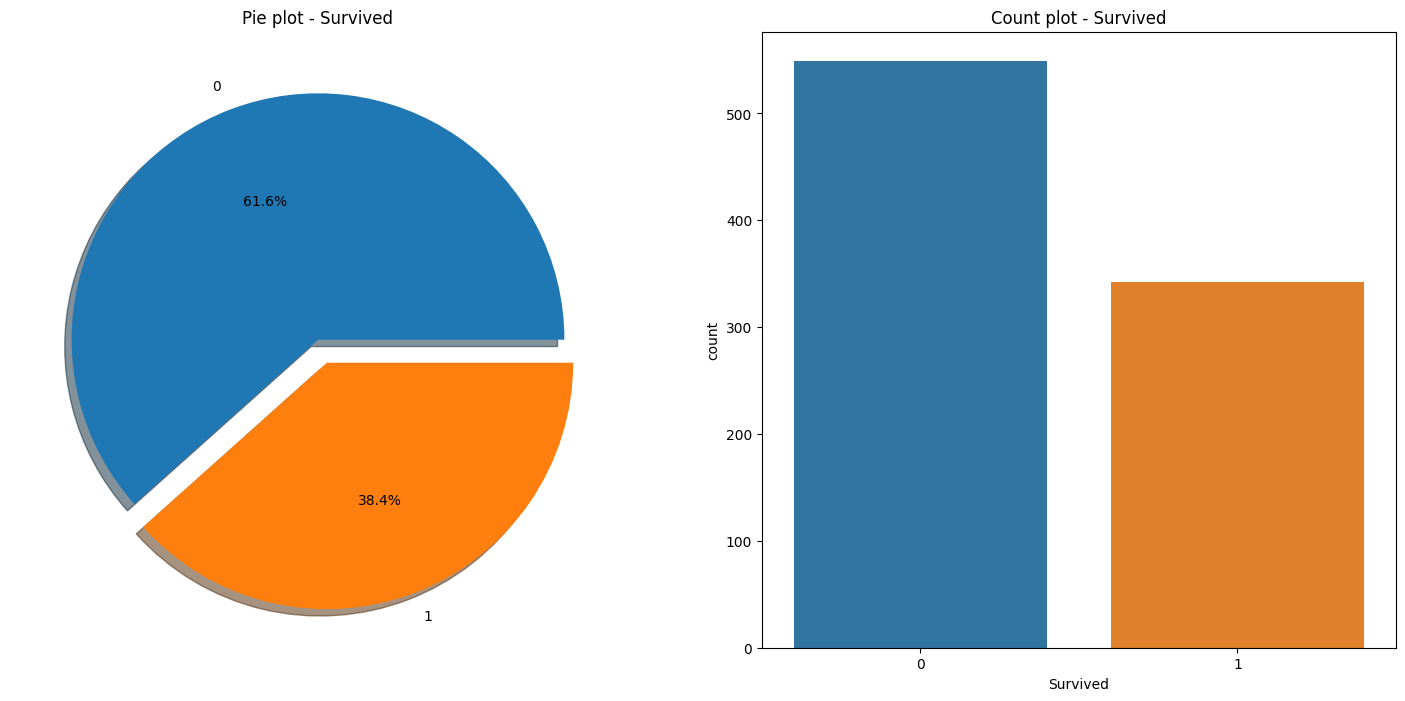

In [42]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=titanic)
ax[1].set_title('Count plot - Survived')

plt.show()

In [15]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
#순서형 데이터 처리

,Survived
Pclass,
1,216
2,184
3,491


In [69]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


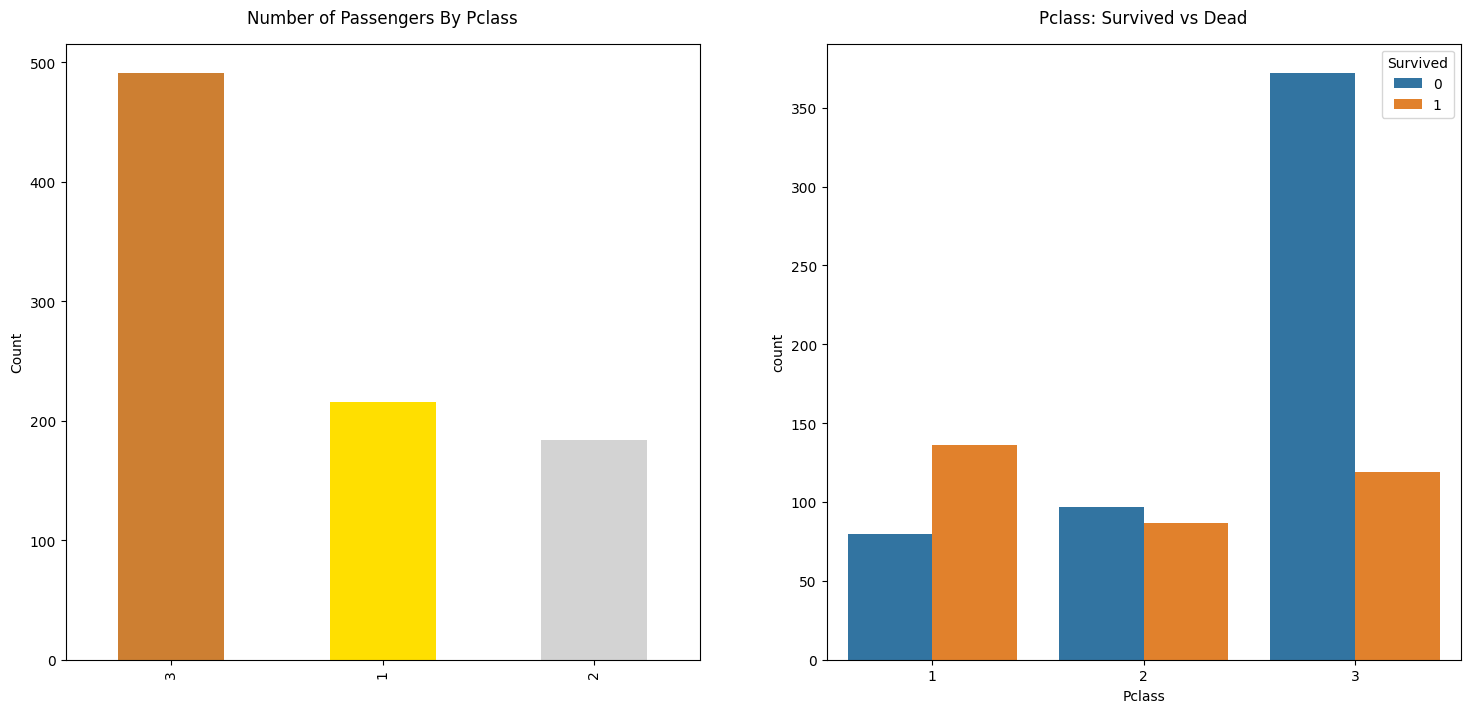

In [43]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

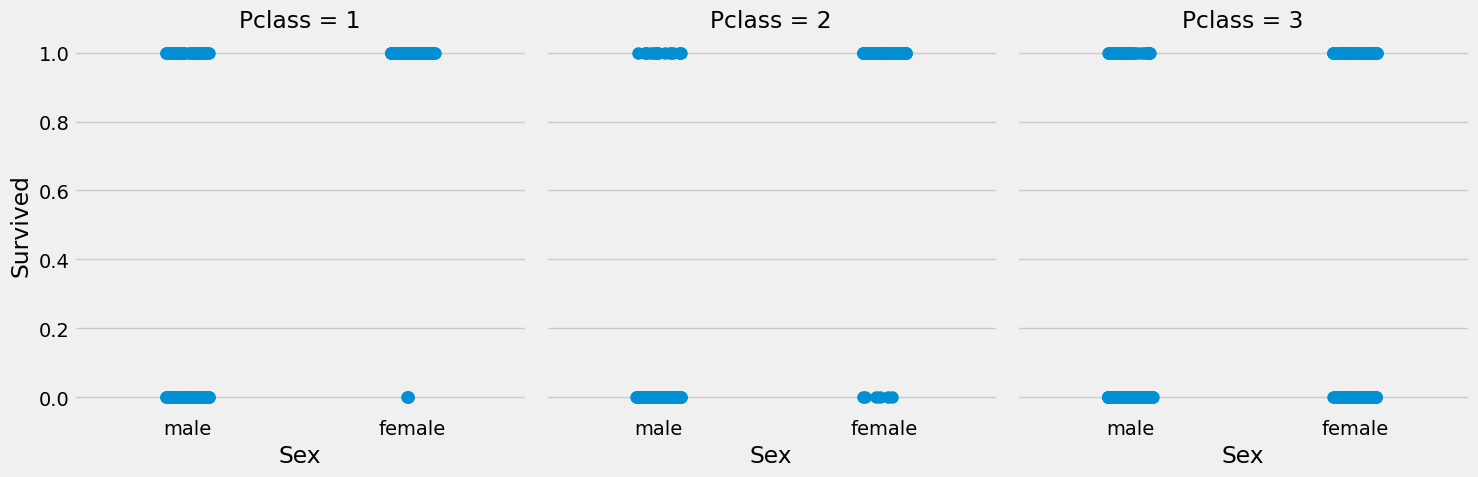

In [71]:
sns.catplot(x='Sex', y='Survived', col='Pclass',
              data=titanic,
               size=9, aspect=1
              )

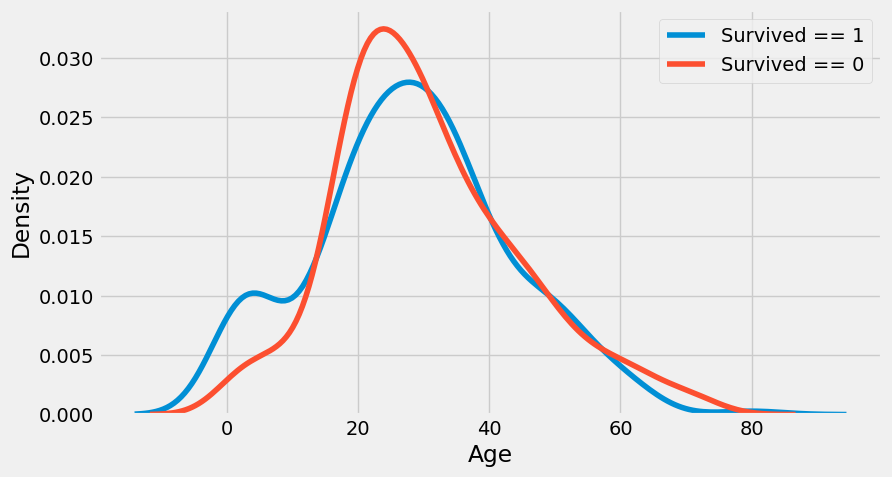

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(titanic[titanic['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(titanic[titanic['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

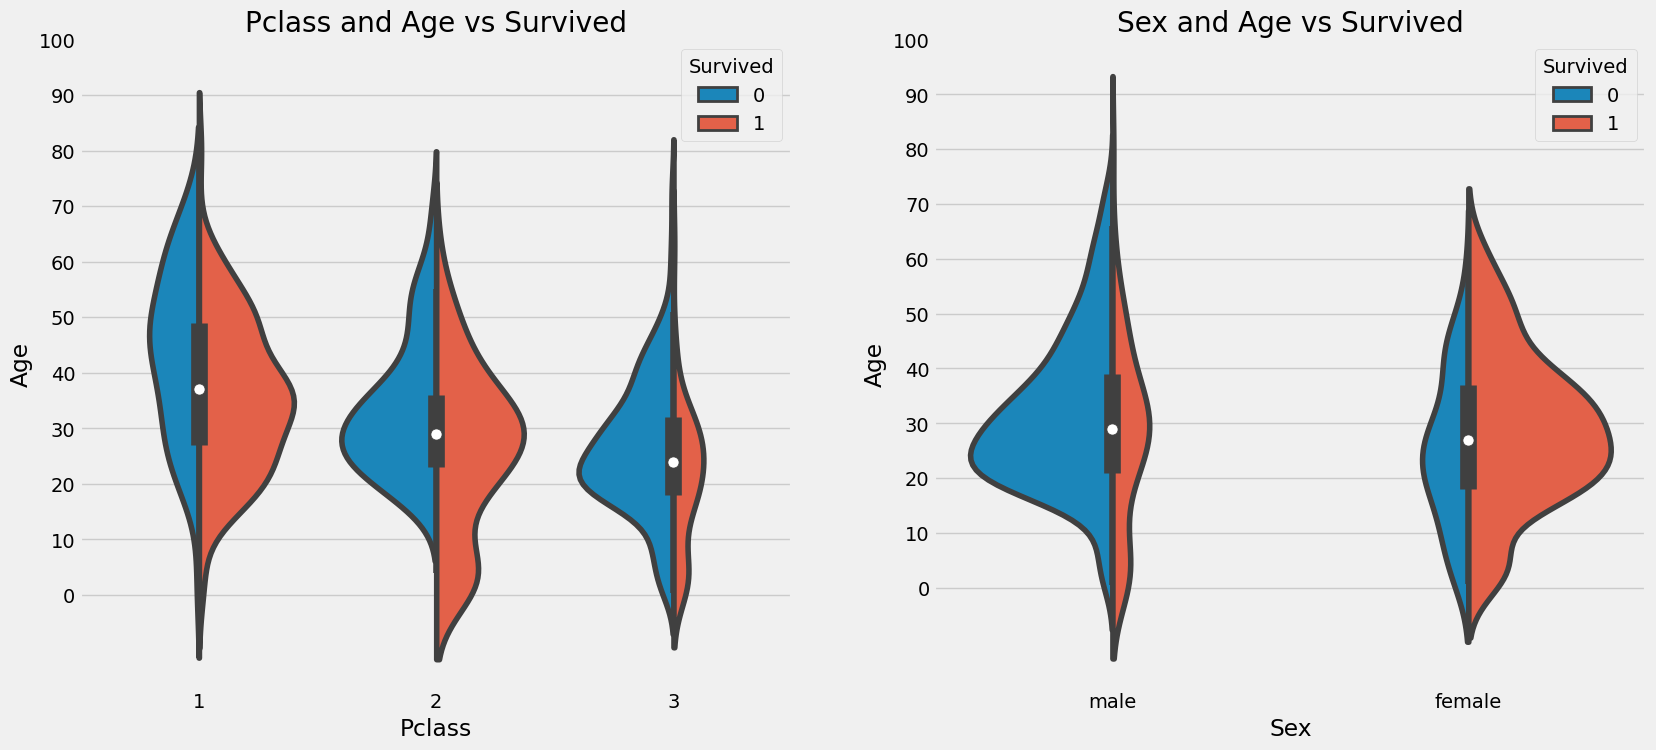

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass", y = "Age", hue="Survived", data=titanic, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex", y = "Age", hue="Survived", data=titanic, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

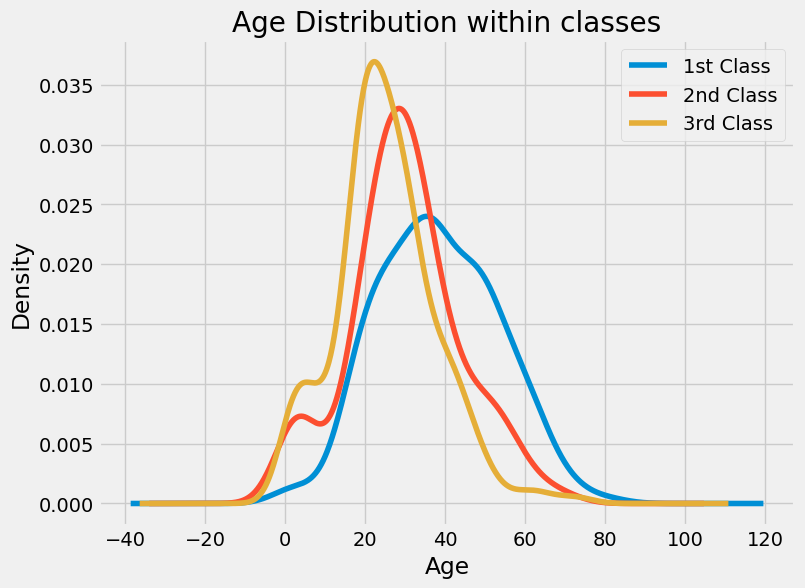

In [72]:
plt.figure(figsize=(8, 6))
titanic['Age'][titanic['Pclass'] == 1].plot(kind='kde')
titanic['Age'][titanic['Pclass'] == 2].plot(kind='kde')
titanic['Age'][titanic['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

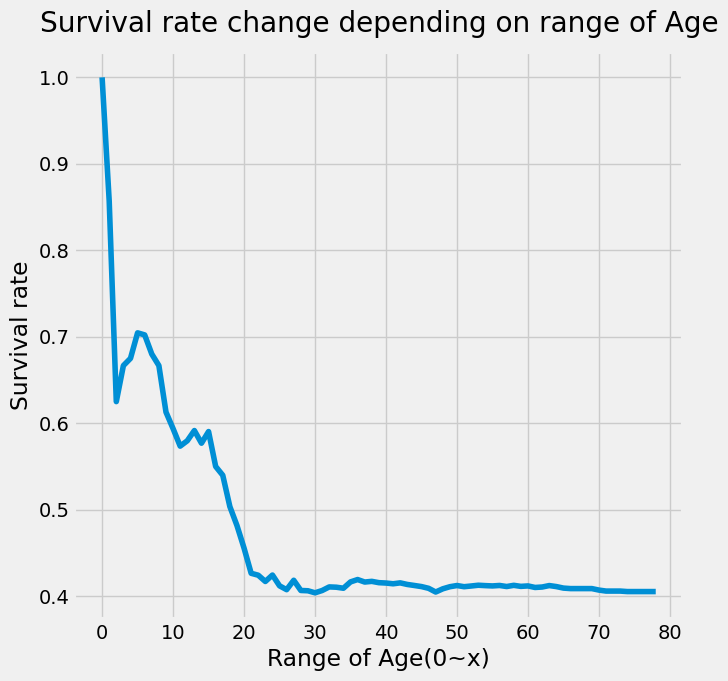

In [73]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(titanic[titanic['Age'] < i]['Survived'].sum() / len(titanic[titanic['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

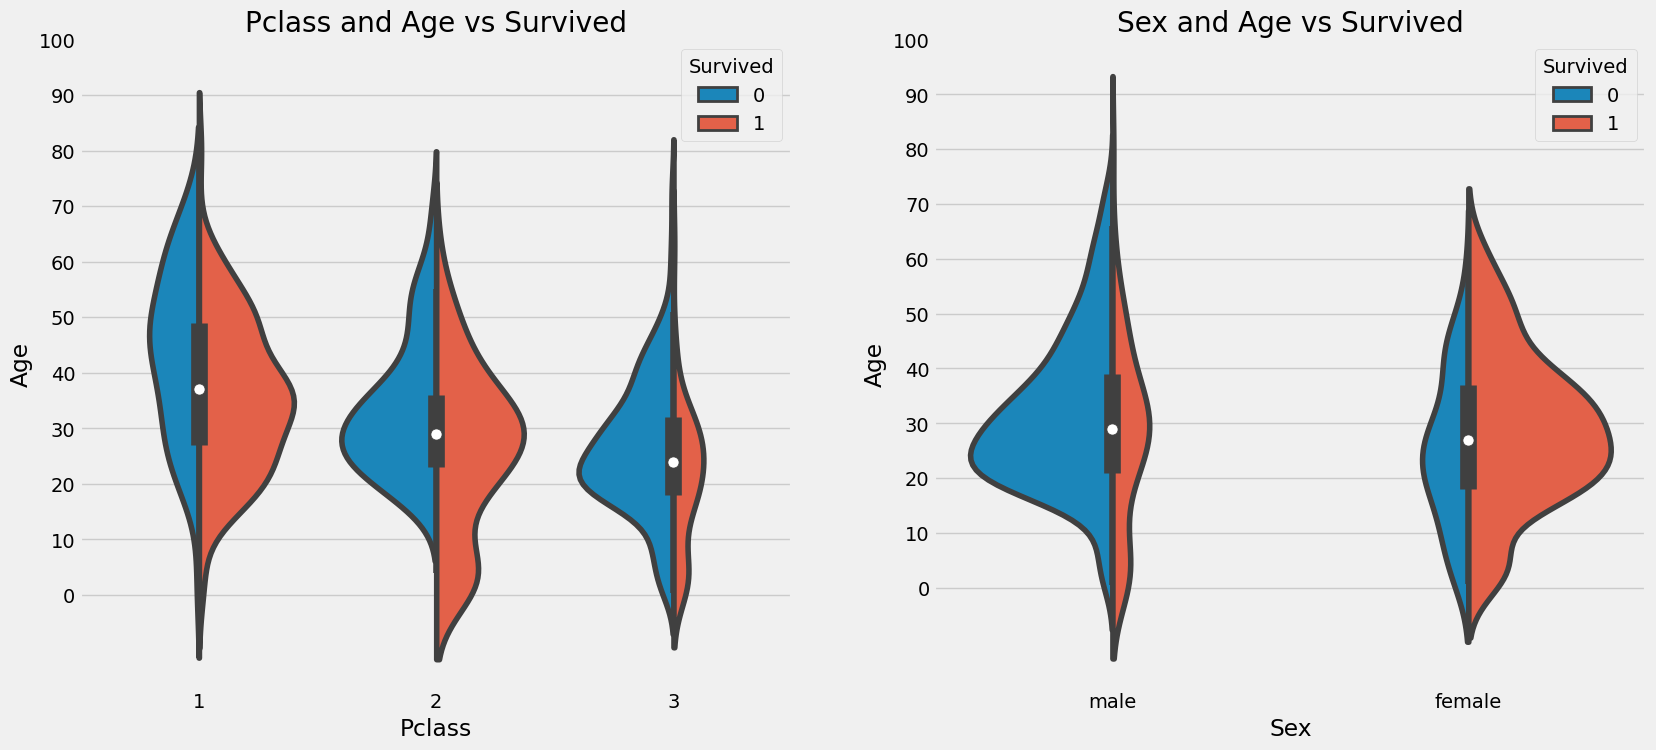

In [84]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=titanic, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=titanic, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.

오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.

생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.

오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

<Axes: xlabel='Embarked'>

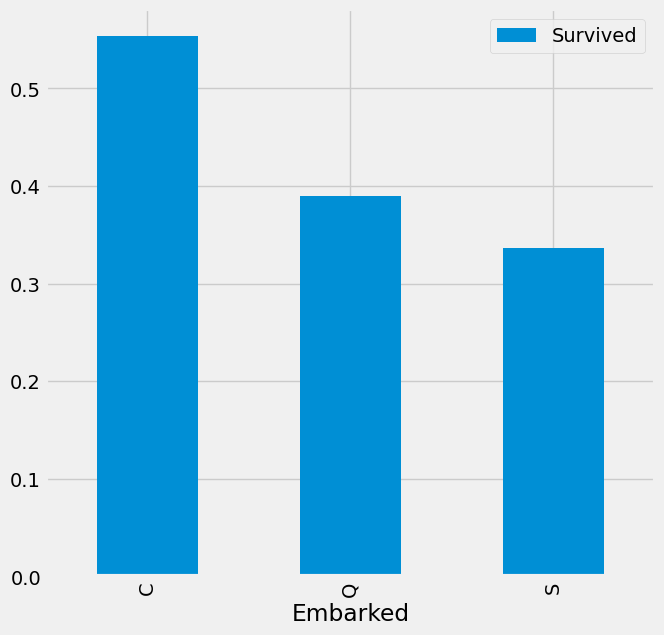

In [74]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

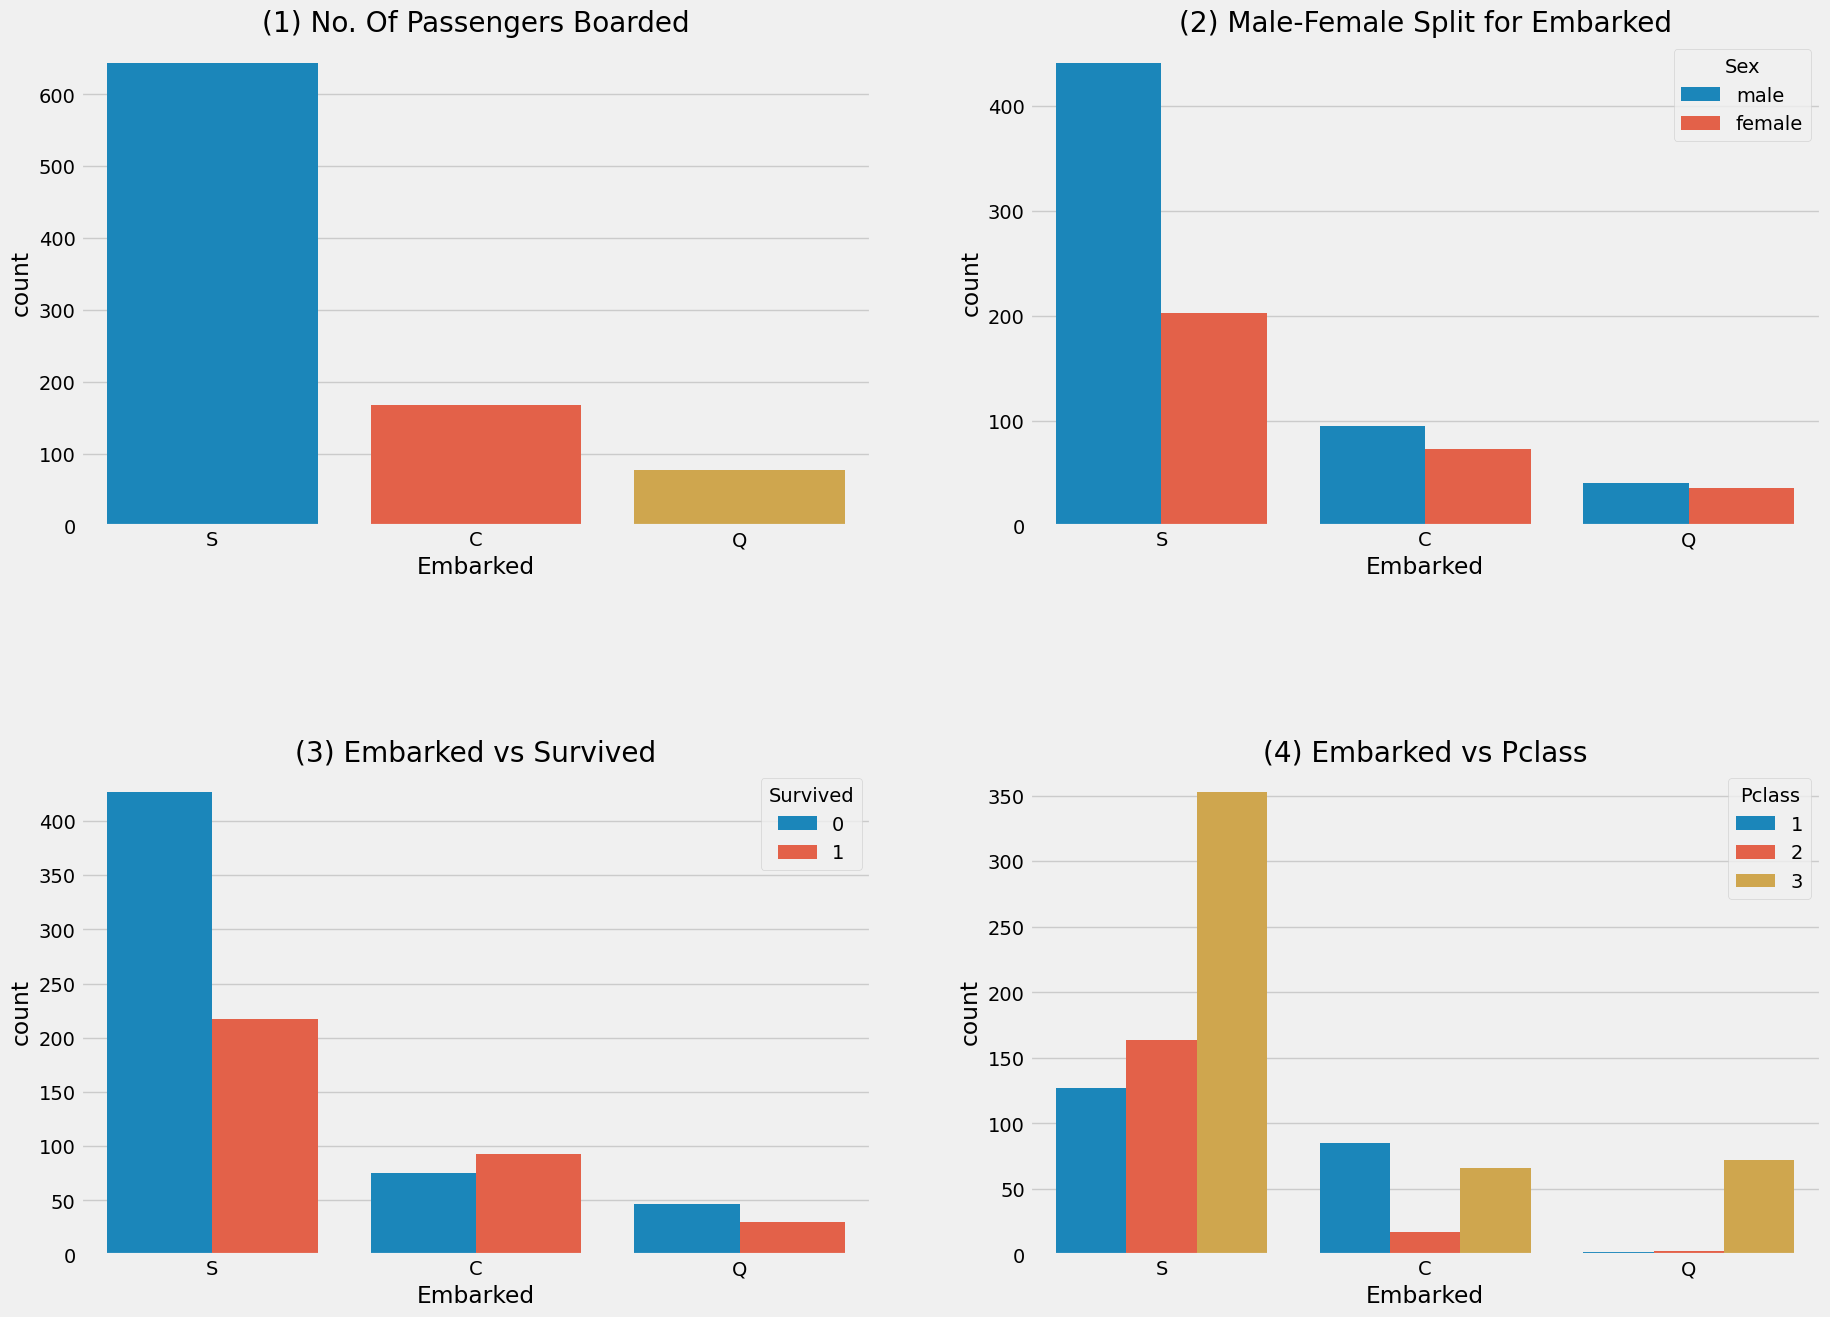

In [76]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=titanic, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=titanic, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=titanic, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=titanic, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.

Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.

Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)

Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [77]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다


In [80]:
print("Maximum size of Family: ", titanic['FamilySize'].max())
print("Minimum size of Family: ", titanic['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.

Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

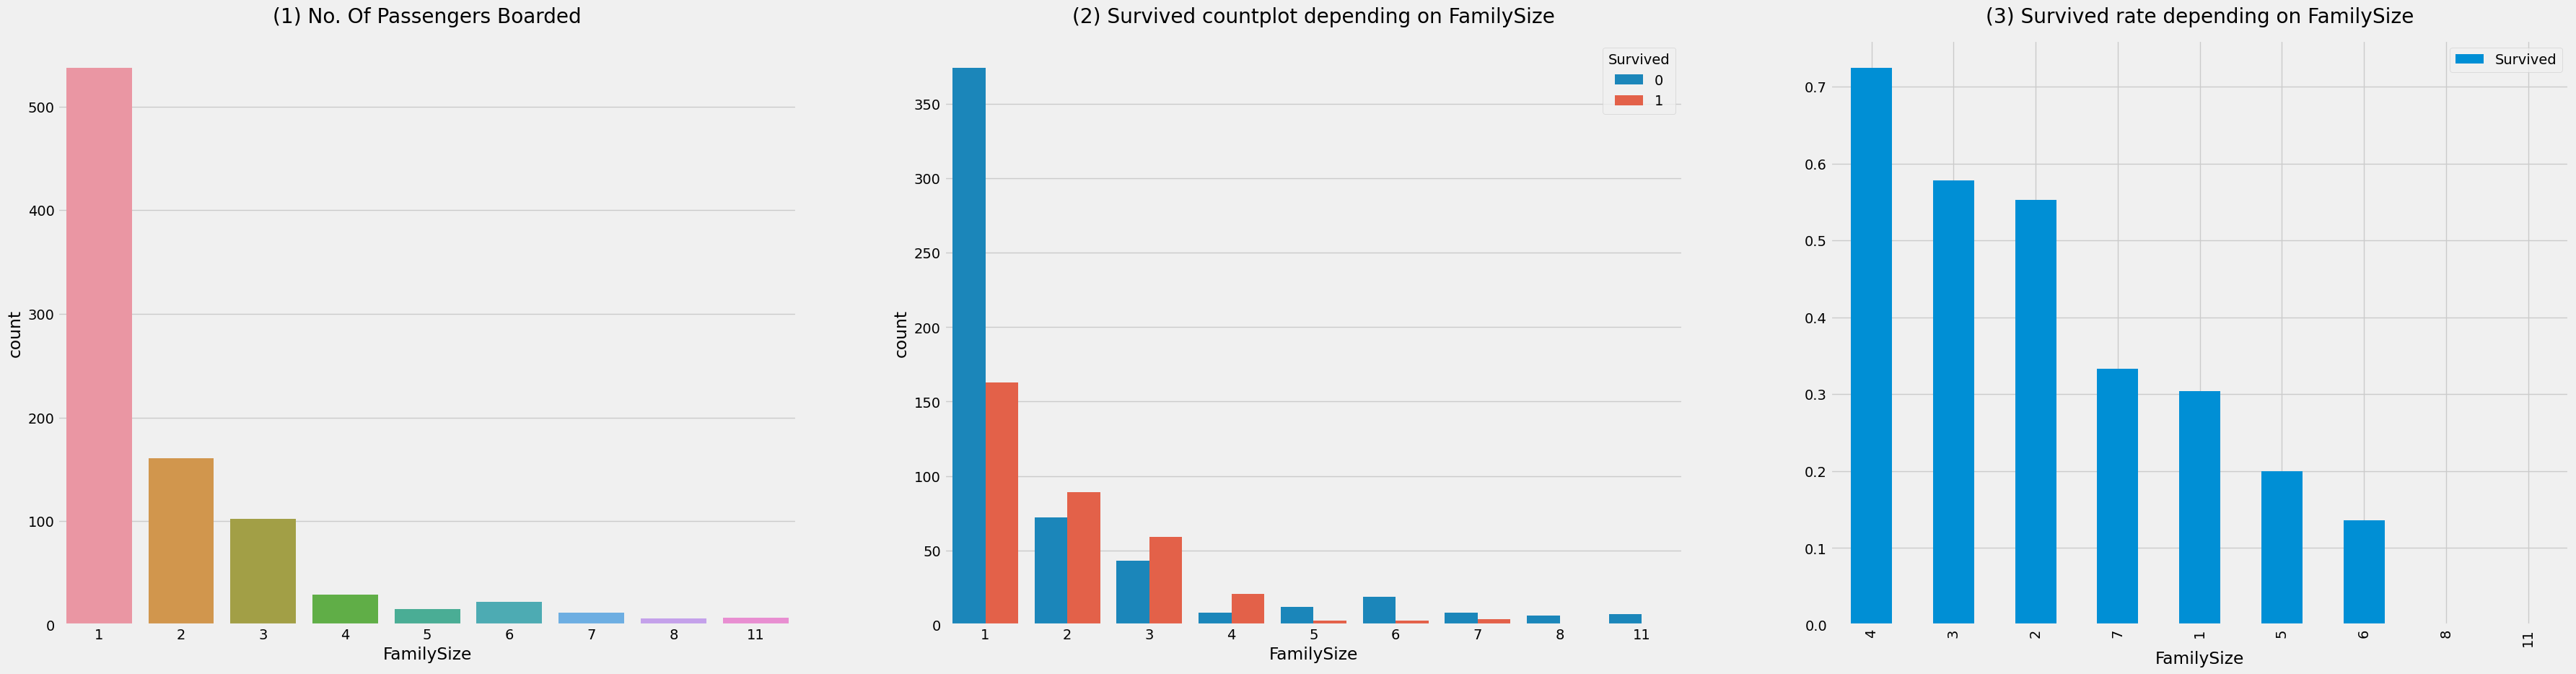

In [83]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=titanic, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

titanic[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram 을 그려보겠습니다.

<ipython-input-85-149bcca7127e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)


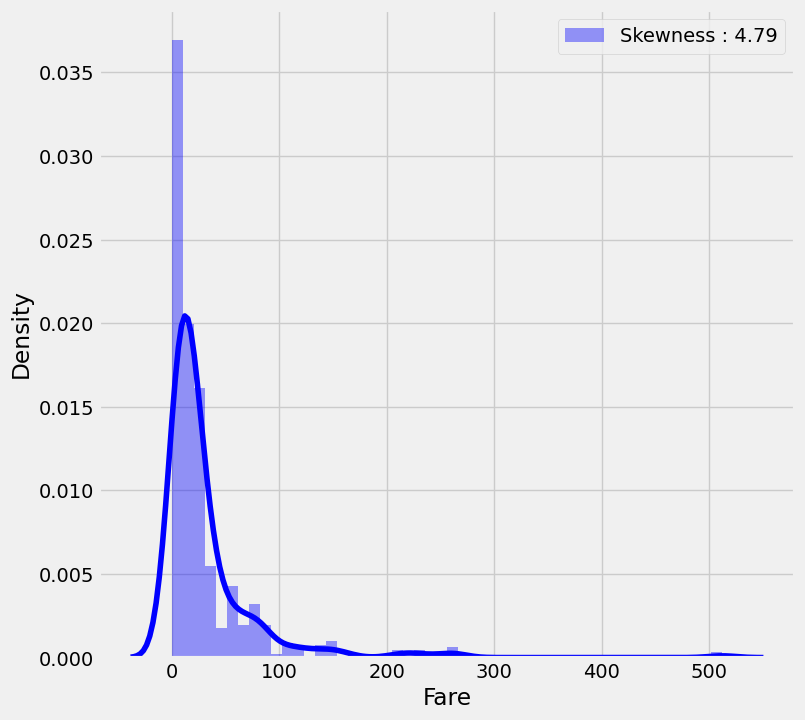

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.

outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.

우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [87]:
import numpy as np

# 아래 줄은 뒤늦게 발견하였습니다. 13번째 강의에 언급되니, 일단 따라치시고 넘어가면 됩니다.
titanic['Fare'] = titanic['Fare'].map(lambda i: np.log(i) if i > 0 else 0)


<ipython-input-88-149bcca7127e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)


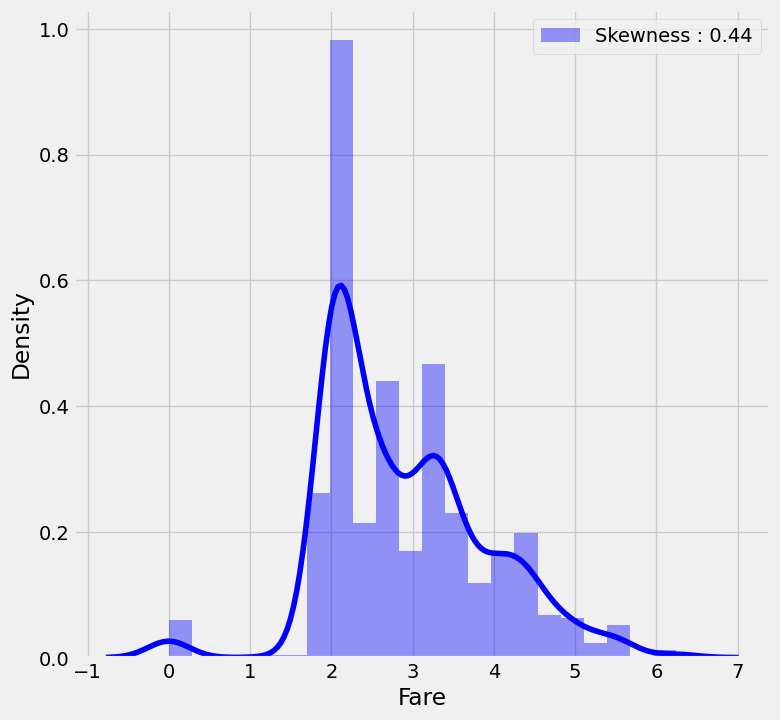

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.

우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.

모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

In [89]:
titanic['Initial']= titanic.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [90]:
pd.crosstab(titanic['Initial'], titanic['Sex']).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [92]:
titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)



In [93]:
titanic.groupby('Initial').mean()

<ipython-input-93-520e2e8dcf4c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Initial').mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

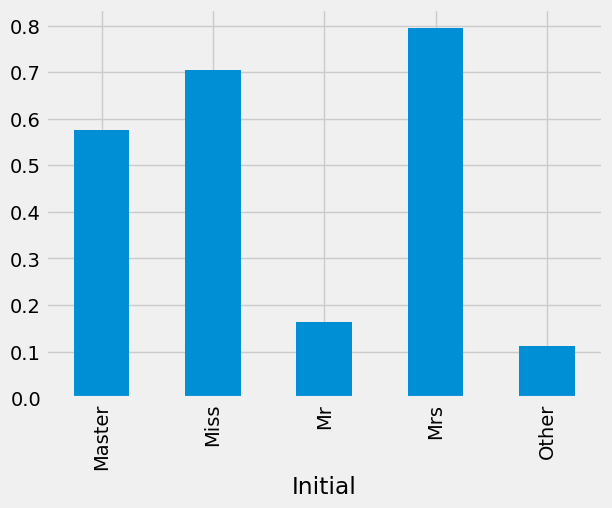

In [94]:
titanic.groupby('Initial')['Survived'].mean().plot.bar()

Age의 평균을 이용해 Null value 를 채우도록 하겠습니다.

pandas dataframe 을 다룰 때에는 boolean array를 이용해 indexing 하는 방법이 참으로 편리합니다.

아래 코드 첫줄을 해석하자면, isnull() 이면서 Initial 이 Mr 인 조건을 만족하는 row(탑승객) 의 'Age' 의 값을 33으로 치환한다 입니다.

loc + boolean + column 을 사용해 값을 치환하는 방법은 자주 쓰이므로 꼭 익숙해집시다.

In [95]:
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age'] = 33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age'] = 36
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age'] = 5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age'] = 22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age'] = 46


In [96]:
titanic['Embarked'].fillna('S', inplace=True)

In [97]:
titanic['Age_cat'] = 0
titanic.loc[titanic['Age'] < 10, 'Age_cat'] = 0
titanic.loc[(10 <= titanic['Age']) & (titanic['Age'] < 20), 'Age_cat'] = 1
titanic.loc[(20 <= titanic['Age']) & (titanic['Age'] < 30), 'Age_cat'] = 2
titanic.loc[(30 <= titanic['Age']) & (titanic['Age'] < 40), 'Age_cat'] = 3
titanic.loc[(40 <= titanic['Age']) & (titanic['Age'] < 50), 'Age_cat'] = 4
titanic.loc[(50 <= titanic['Age']) & (titanic['Age'] < 60), 'Age_cat'] = 5
titanic.loc[(60 <= titanic['Age']) & (titanic['Age'] < 70), 'Age_cat'] = 6
titanic.loc[70 <= titanic['Age'], 'Age_cat'] = 7


In [99]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
titanic['Age_cat_2'] = titanic['Age'].apply(category_age)

In [100]:
titanic.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)

In [101]:
titanic['Initial'] = titanic['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [102]:
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [103]:
titanic['Sex'] = titanic['Sex'].map({'female': 0, 'male': 1})

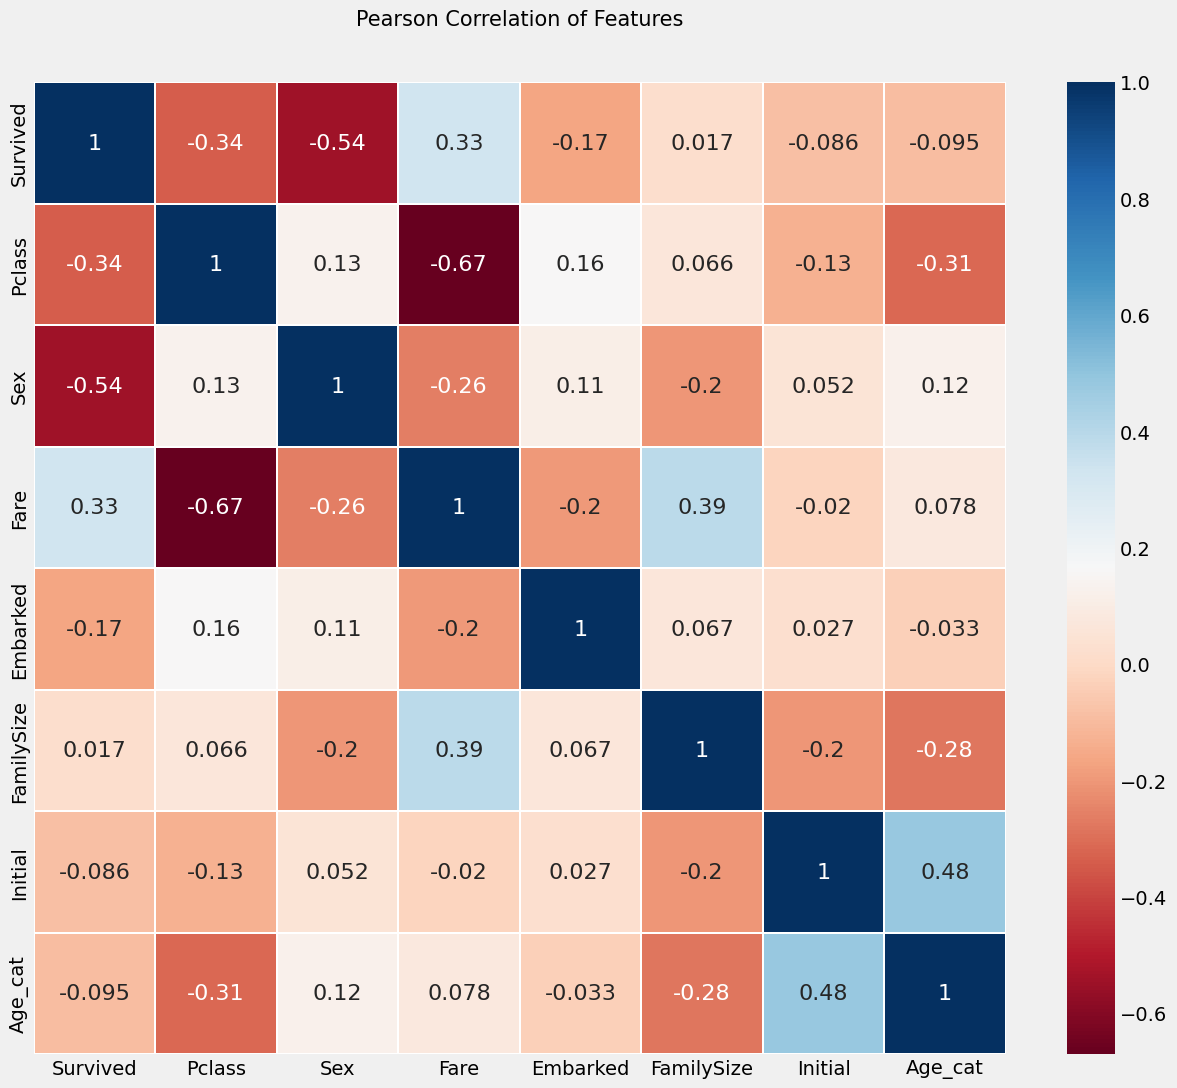

In [104]:
heatmap_data = titanic[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data